In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### seuillage : afficher l'image

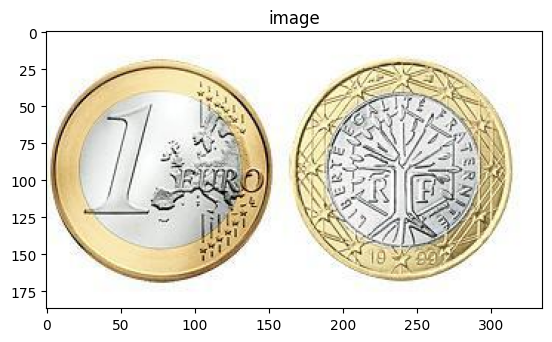

In [26]:
img = cv2.imread("datas/euro.jpeg")
#img = cv2.imread("datas/pieces.jpg")
img0 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img0)

plt.title('image')


plt.show()

#### visualisation de l'histogramme

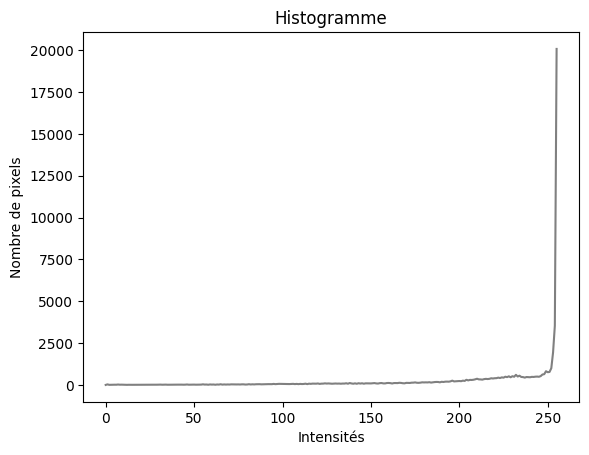

In [27]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Tracé de l'histogramme
plt.plot(hist, color='gray' )
plt.xlabel('Intensités')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme')


plt.show()

###  seuillage fixe

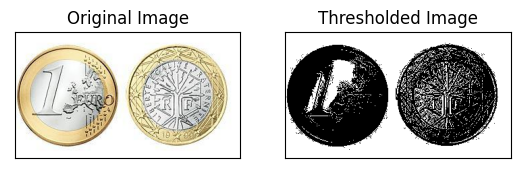

In [28]:
# Load the image in grayscale
#img = cv2.imread('datas/euro.jpeg', 0)

# Apply thresholding
ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
#ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
# Plot the original and thresholded image using matplotlib
plt.subplot(1, 2, 1), plt.imshow(img0, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### seuillage moyen

221.88851464602124


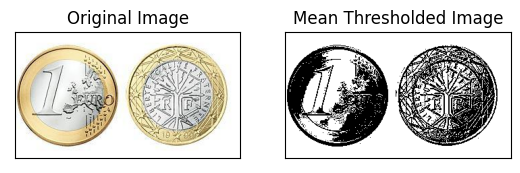

In [29]:
# Calculate the threshold value using mean thresholding
threshold_value = cv2.mean(gray)[0]
print(threshold_value)
# Apply mean thresholding to the image
ret, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using Matplotlib
plt.subplot(1, 2, 1)
plt.imshow(img0, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Mean Thresholded Image')
plt.xticks([]), plt.yticks([])

plt.show()

### seuillage automatique : Otsu

seuil:  185.0


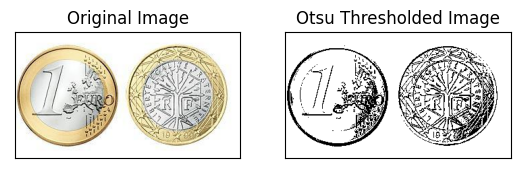

In [30]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("seuil: ", ret)
# Plot the original and thresholded image using matplotlib
plt.subplot(1, 2, 1), plt.imshow(img0, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(thresh, cmap='gray')
plt.title('Otsu Thresholded Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Bonus: Detection de contours

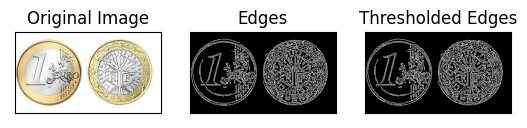

In [31]:
edges = cv2.Canny(gray, 100, 200)

# Apply binary thresholding to the edges
ret, thresh = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)

# Plot the original, edges, and thresholded image using matplotlib
plt.subplot(1, 3, 1), plt.imshow(img0)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(edges, cmap='gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Edges'), plt.xticks([]), plt.yticks([])
plt.show()

### Seuillage avec Kmeans 

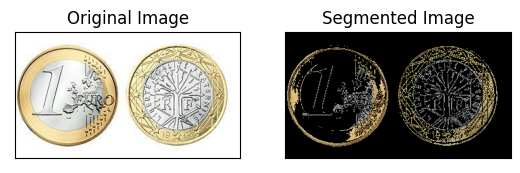

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('datas/euro.jpeg')

# Convert the image to RGB color space
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels and 3 color channels
pixels = img_rgb.reshape((-1, 3))

# Convert the data type to float32
pixels = np.float32(pixels)

# Define the criteria for clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Perform K-means clustering with K=2
K = 2
ret, label, center = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshape the labels back into the original image shape
label = label.reshape(img.shape[:2])

# Create masks for each label
mask0 = np.uint8(label == 0)
mask1 = np.uint8(label == 1)

# Apply the masks to the original image to get the segmented image
segmented_img = cv2.bitwise_and(img_rgb, img_rgb, mask=mask0)

# Plot the original and segmented images using matplotlib
plt.subplot(1, 2, 1), plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(segmented_img)
plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])
plt.show()
